# Python Learning Sessions: Feature Engineering

![feature_selection](resources\sklearn.feature_selection.png)

## Feature Selection
Unlike deep learning, with machine learnning models, usually we want to select the features that are most important to the model.
Including all features may cause your model to **overfit** the data and make it unable to generalize to new data. It can also **slow** down the training process, and possibly improve the model's score (Post, 2016)

In [63]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import set_config

set_config(display="diagram")

In [2]:
link = 'https://raw.githubusercontent.com/mwaskom/seaborn-data/master/taxis.csv'
df = pd.read_csv(link, parse_dates=[0, 1])
df

,pickup,dropoff,passengers,distance,fare,tip,tolls,total,color,payment,pickup_zone,dropoff_zone,pickup_borough,dropoff_borough
0,2019-03-23 20:21:09,2019-03-23 20:27:24,1,1.60,7.0,2.15,0.0,12.95,yellow,credit card,Lenox Hill West,UN/Turtle Bay South,Manhattan,Manhattan
1,2019-03-04 16:11:55,2019-03-04 16:19:00,1,0.79,5.0,0.00,0.0,9.30,yellow,cash,Upper West Side South,Upper West Side South,Manhattan,Manhattan
2,2019-03-27 17:53:01,2019-03-27 18:00:25,1,1.37,7.5,2.36,0.0,14.16,yellow,credit card,Alphabet City,West Village,Manhattan,Manhattan
3,2019-03-10 01:23:59,2019-03-10 01:49:51,1,7.70,27.0,6.15,0.0,36.95,yellow,credit card,Hudson Sq,Yorkville West,Manhattan,Manhattan
4,2019-03-30 13:27:42,2019-03-30 13:37:14,3,2.16,9.0,1.10,0.0,13.40,yellow,credit card,Midtown East,Yorkville West,Manhattan,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6428,2019-03-31 09:51:53,2019-03-31 09:55:27,1,0.75,4.5,1.06,0.0,6.36,green,credit card,East Harlem North,Central Harlem North,Manhattan,Manhattan
6429,2019-03-31 17:38:00,2019-03-31 18:34:23,1,18.74,58.0,0.00,0.0,58.80,green,credit card,Jamaica,East Concourse/Concourse Village,Queens,Bronx
6430,2019-03-23 22:55:18,2019-03-23 23:14:25,1,4.14,16.0,0.00,0.0,17.30,green,cash,Crown Heights North,Bushwick North,Brooklyn,Brooklyn
6431,2019-03-04 10:09:25,2019-03-04 10:14:29,1,1.12,6.0,0.00,0.0,6.80,green,credit card,East New York,East Flatbush/Remsen Village,Brooklyn,Brooklyn


### Removing features with low variance

#### VarianceThreshold
Variance Threshold is a feature selection technique that removes features with low variance.
This can be used to remove features that have little or no impact on the target.
It can also help remove quasi-constant features.

In [3]:
from sklearn.feature_selection import VarianceThreshold
from sklearn.preprocessing import OrdinalEncoder, FunctionTransformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer, make_column_selector

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   object        
 9   payment          6389 non-null   object        
 10  pickup_zone      6407 non-null   object        
 11  dropoff_zone     6388 non-null   object        
 12  pickup_borough   6407 non-null   object        
 13  dropoff_borough  6388 non-null   object        
dtypes: datetime64[ns](2), float64(5), int64(

In [5]:
def convert_text_cols_to_categorical(df):
    cols = df.select_dtypes(include=['object']).columns
    return df.astype({col: 'category' for col in cols})

In [6]:
df.pipe(convert_text_cols_to_categorical).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6433 entries, 0 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           6433 non-null   datetime64[ns]
 1   dropoff          6433 non-null   datetime64[ns]
 2   passengers       6433 non-null   int64         
 3   distance         6433 non-null   float64       
 4   fare             6433 non-null   float64       
 5   tip              6433 non-null   float64       
 6   tolls            6433 non-null   float64       
 7   total            6433 non-null   float64       
 8   color            6433 non-null   category      
 9   payment          6389 non-null   category      
 10  pickup_zone      6407 non-null   category      
 11  dropoff_zone     6388 non-null   category      
 12  pickup_borough   6407 non-null   category      
 13  dropoff_borough  6388 non-null   category      
dtypes: category(6), datetime64[ns](2), float

In [7]:
X = df\
    .loc[lambda x: x.color == 'green']\
    .pipe(convert_text_cols_to_categorical)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 5451 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           982 non-null    datetime64[ns]
 1   dropoff          982 non-null    datetime64[ns]
 2   passengers       982 non-null    int64         
 3   distance         982 non-null    float64       
 4   fare             982 non-null    float64       
 5   tip              982 non-null    float64       
 6   tolls            982 non-null    float64       
 7   total            982 non-null    float64       
 8   color            982 non-null    category      
 9   payment          977 non-null    category      
 10  pickup_zone      978 non-null    category      
 11  dropoff_zone     973 non-null    category      
 12  pickup_borough   978 non-null    category      
 13  dropoff_borough  973 non-null    category      
dtypes: category(6), datetime64[ns](2), flo

In [96]:
preproc = ColumnTransformer(
    transformers=[
        ('date', 'drop', make_column_selector(dtype_include=['datetime64[ns]'])),
        ('categorical', OrdinalEncoder() , make_column_selector(dtype_include=['category']))
    ],
    remainder='passthrough',
)
preproc

ColumnTransformer(remainder='passthrough',
                  transformers=[('date', 'drop',
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E4F0>),
                                ('categorical', OrdinalEncoder(),
                                 <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E2B0>)])

In [9]:
def drop_na(df):
    return df.dropna()

In [10]:
pipe = Pipeline(
    steps=[
        ('drop_missing', FunctionTransformer(drop_na)),
        ('preprocess', preproc),
        ('variance', VarianceThreshold()),
    ]
)
pipe

Pipeline(steps=[('drop_missing',
                 FunctionTransformer(func=<function drop_na at 0x000001AA6BE6C790>)),
                ('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date', 'drop',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6BE4F0A0>),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6BE59D30>)])),
                ('variance', VarianceThreshold())])

In [11]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 5451 to 6432
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   pickup           982 non-null    datetime64[ns]
 1   dropoff          982 non-null    datetime64[ns]
 2   passengers       982 non-null    int64         
 3   distance         982 non-null    float64       
 4   fare             982 non-null    float64       
 5   tip              982 non-null    float64       
 6   tolls            982 non-null    float64       
 7   total            982 non-null    float64       
 8   color            982 non-null    category      
 9   payment          977 non-null    category      
 10  pickup_zone      978 non-null    category      
 11  dropoff_zone     973 non-null    category      
 12  pickup_borough   978 non-null    category      
 13  dropoff_borough  973 non-null    category      
dtypes: category(6), datetime64[ns](2), flo

In [20]:
X_train = pipe.fit_transform(X)
X_train.shape

(968, 11)

### Univariate feature selection
* `SelectKBest` removes all but the $k$ highest scoring features
* `SelectPercentile` removes all but a user-specified highest scoring percentage of features
* using common univariate statistical tests for each feature: false positive rate `SelectFpr`, false discovery rate `SelectFdr`, or family wise error `SelectFwe`.
* `GenericUnivariateSelect` allows to perform univariate feature selection with a configurable strategy. This allows to select the best univariate selection strategy with hyper-parameter search estimator.

In [99]:
from sklearn.datasets import load_iris
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import  f_regression, mutual_info_regression
from sklearn.impute import SimpleImputer

pipe = Pipeline(
    steps=[
        ('preprocess', preproc),
        ('impute', SimpleImputer()),
        ('variance', VarianceThreshold()),
        ('select_k_best', SelectKBest(f_regression, k=3)),
    ]
)
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date', 'drop',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E4F0>),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E2B0>)])),
                ('impute', SimpleImputer()), ('variance', VarianceThreshold()),
                ('select_k_best',
                 SelectKBest(k=3,
                             score_func=<function f_regression at 0x000001AA6BA80310>))])

In [100]:
pipe.fit_transform(X.drop(columns='fare'), X['fare'])

array([[ 2.29,  0.  , 15.8 ],
       [ 0.8 ,  0.  ,  6.8 ],
       [ 1.51,  0.  , 10.5 ],
       ...,
       [ 4.14,  0.  , 17.3 ],
       [ 1.12,  0.  ,  6.8 ],
       [ 3.85,  0.  , 20.16]])

### Feature selection using SelectFromModel
Using feature importance, we can select the features that are most important to the model. In a linear model, we can use L1 or L2 regularization to select the features that are most important to the model. L1 or Lasso provides a more sparse solution since it penalizes having more coefficients.

#### Linear Model trained with L1 prior as regularizer

In [108]:
from sklearn.linear_model import Lasso, LinearRegression

pipe = Pipeline(
    steps=[
        ('preprocess', preproc),
        ('impute', SimpleImputer()),
        ('variance', VarianceThreshold()),
        ('selector', Lasso(alpha=0.8)),
    ]
)
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date', 'drop',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E4F0>),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E2B0>)])),
                ('impute', SimpleImputer()), ('variance', VarianceThreshold()),
                ('selector', Lasso(alpha=0.8))])

In [109]:
pipe.fit(X.drop(columns='fare'), X['fare'])

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date', 'drop',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E4F0>),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E2B0>)])),
                ('impute', SimpleImputer()), ('variance', VarianceThreshold()),
                ('selector', Lasso(alpha=0.8))])

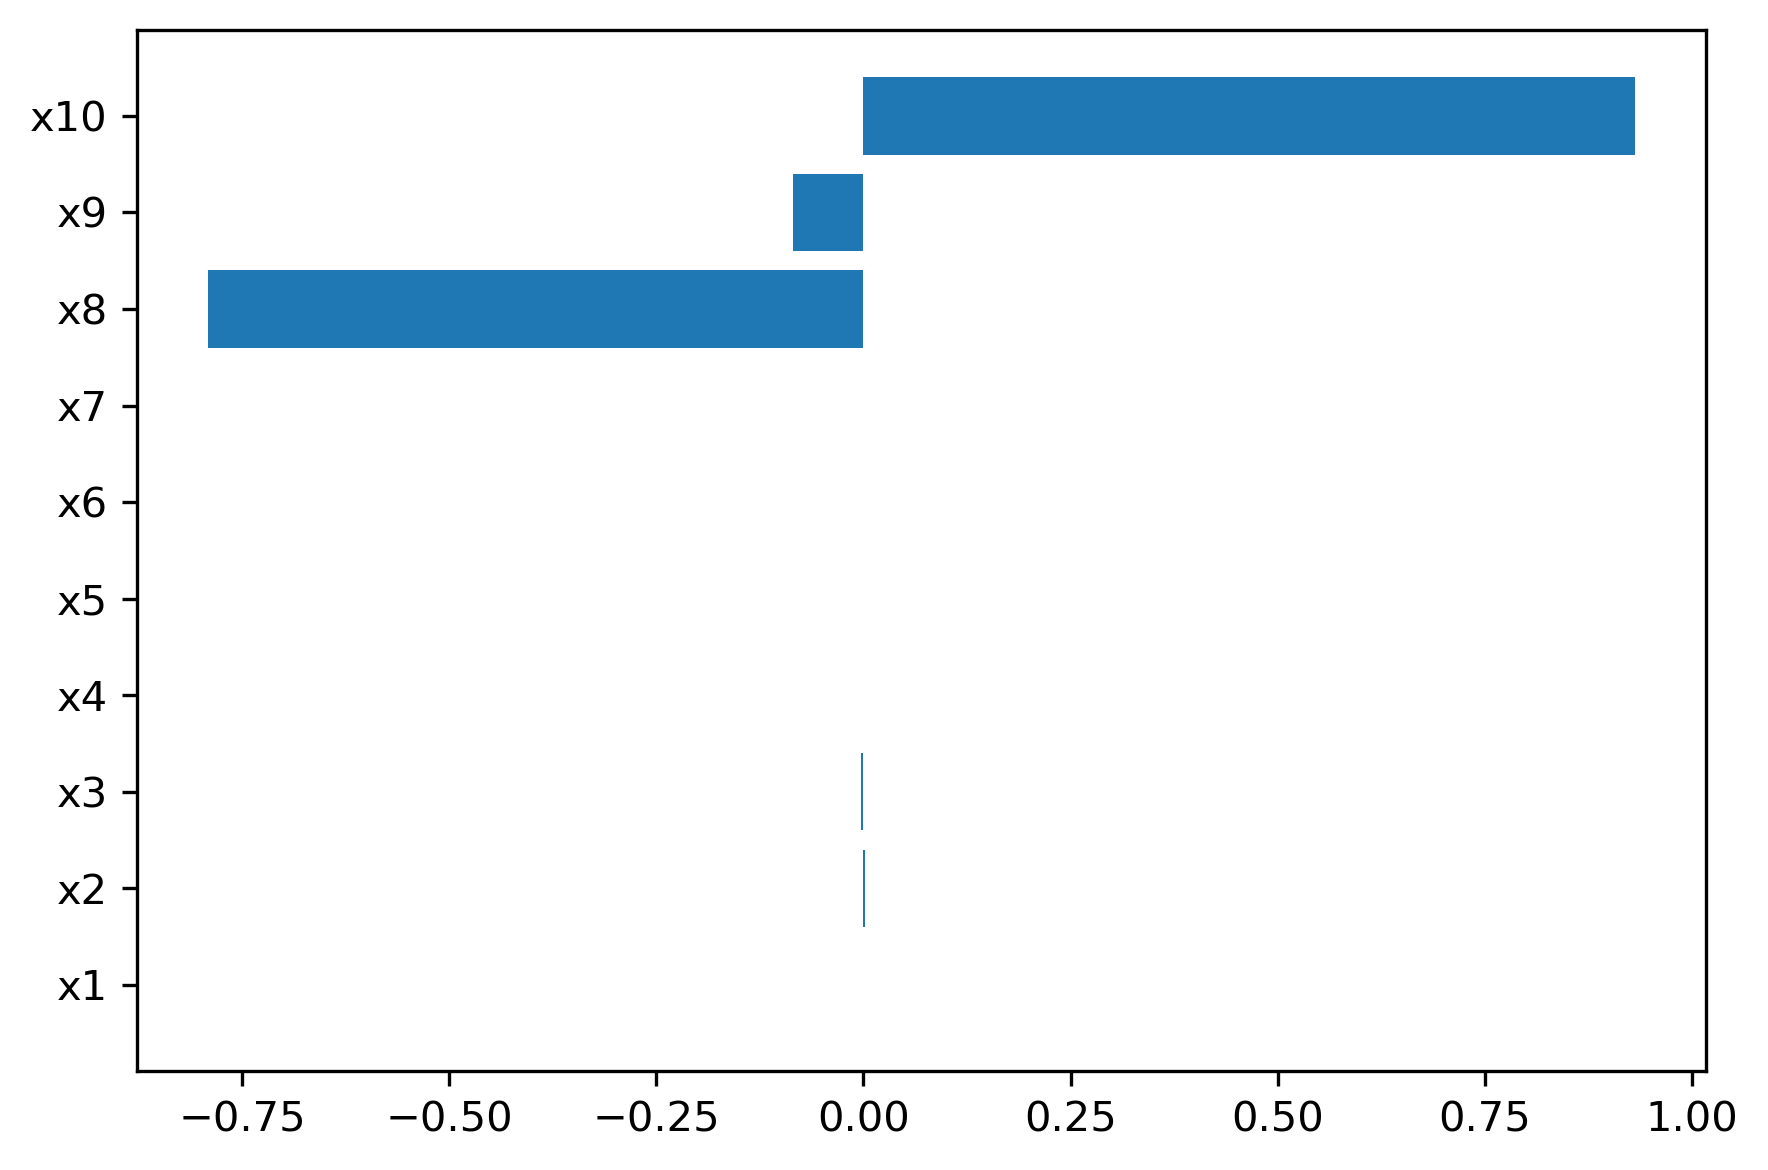

In [110]:
fig, ax = plt.subplots(dpi=300)
ax.barh(
    y=pipe['variance'].get_feature_names_out(),
    width=pipe['selector'].coef_)
fig .tight_layout()

#### Feature selection using SelectFromModel

In [111]:
from sklearn.feature_selection import SelectFromModel

pipe = Pipeline(
    steps=[
        ('preprocess', preproc),
        ('impute', SimpleImputer()),
        ('variance', VarianceThreshold()),
        ('selector', SelectFromModel(Lasso(alpha=.8))),
    ]
)
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date', 'drop',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E4F0>),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6F08E2B0>)])),
                ('impute', SimpleImputer()), ('variance', VarianceThreshold()),
                ('selector', SelectFromModel(estimator=Lasso(alpha=0.8)))])

In [112]:
pipe.fit_transform(X.drop(columns='fare'), X['fare'])

array([[ 57.  ,  37.  ,   0.  ,   0.  ,  15.8 ],
       [ 75.  ,  89.  ,   0.  ,   0.  ,   6.8 ],
       [ 45.  ,  51.  ,   1.2 ,   0.  ,  10.5 ],
       ...,
       [ 34.  ,  21.  ,   0.  ,   0.  ,  17.3 ],
       [ 47.  ,  49.  ,   0.  ,   0.  ,   6.8 ],
       [ 11.  , 181.  ,   3.36,   0.  ,  20.16]])

### Recursive feature elimination

In [91]:
from sklearn.feature_selection import RFE

pipe = Pipeline(
    steps=[
        ('preprocess', preproc),
        ('impute', SimpleImputer()),
        ('variance', VarianceThreshold()),
        ('selector', RFE(
            estimator=Lasso(alpha=.8),
            n_features_to_select=4,
            step=1
        )),
    ]
)
pipe

Pipeline(steps=[('preprocess',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('date', 'drop',
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6BE4F0A0>),
                                                 ('categorical',
                                                  OrdinalEncoder(),
                                                  <sklearn.compose._column_transformer.make_column_selector object at 0x000001AA6BE59D30>)])),
                ('impute', SimpleImputer()), ('variance', VarianceThreshold()),
                ('selector',
                 RFE(estimator=Lasso(alpha=0.8), n_features_to_select=4))])

In [92]:
pipe.fit_transform(X.drop(columns='fare'), X['fare'])

array([[ 37.  ,   0.  ,   0.  ,  15.8 ],
       [ 89.  ,   0.  ,   0.  ,   6.8 ],
       [ 51.  ,   1.2 ,   0.  ,  10.5 ],
       ...,
       [ 21.  ,   0.  ,   0.  ,  17.3 ],
       [ 49.  ,   0.  ,   0.  ,   6.8 ],
       [181.  ,   3.36,   0.  ,  20.16]])

### Sequential Feature Selection

## References
* [1.13. Feature selection](https://scikit-learn.org/stable/modules/feature_selection.html)
* Post, Martijn J. et al. “Does Feature Selection Improve Classification? A Large Scale Experiment in OpenML.” *IDA* (2016).